In [1]:
# Setup
import warnings; warnings.simplefilter('ignore')
# set this to your working directory
WORKING_DIR = '/home/elliott/Dropbox/_Ash_Teaching/2018-09 - Bocconi - Text Data and ML/code'
import os
os.chdir(WORKING_DIR)

import pandas as pd
df1 = pd.read_csv('death-penalty-cases.csv')
# set this to your working directory
WORKING_DIR = '/home/elliott/Dropbox/_Ash_Teaching/2018-09 - Bocconi - Text Data and ML/code'
import os
os.chdir(WORKING_DIR) # set working directory 

In [2]:
# Pandas Data-frames
# open dataset
import pandas as pd
df1 = pd.read_csv('death-penalty-cases.csv')
df1.head() # show top few lines of data

,court_id,author_id,state,year,dateFiled,citeCount,snippet
0,nj,NaN,NJ,1965,1965-09-14T00:00:00Z,8,N.J. ( )\n A. d \nIN RE WAIVER OF DEATH PE...
1,fla,4019.0,FL,1973,1973-07-26T00:00:00Z,552,"whether the death penalty is, per se, unconsti..."
2,texcrimapp,5765.0,TX,1975,1975-04-16T00:00:00Z,143,# ;s contention that the assessment of the dea...
3,nm,NaN,NM,2009,2009-11-30T00:00:00Z,0,. d ( )\n -NMSC- \nIN THE MATTER OF DEATH PE...
4,texcrimapp,5758.0,TX,1944,1944-12-20T00:00:00Z,56,assume the district attorney orally waived the...


In [3]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 7 columns):
court_id     32567 non-null object
author_id    18215 non-null float64
state        32567 non-null object
year         32567 non-null int64
dateFiled    32567 non-null object
citeCount    32567 non-null int64
snippet      32567 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 1.7+ MB


In [4]:
df1['court_id'].value_counts()

texapp             2577
texcrimapp         2380
fla                1927
cal                1310
ga                 1104
illappct           1077
pa                  930
miss                925
ill                 895
oklacrimapp         760
nc                  731
calctapp            723
tenncrimapp         723
alacrimapp          711
ohioctapp           611
ariz                552
wva                 545
ind                 515
la                  512
mo                  507
ark                 459
nysd                390
ala                 379
tenn                368
fladistctapp        359
nyed                325
sc                  323
nev                 294
pasuperct           291
wash                272
                   ... 
iasd                  7
akd                   6
lamd                  6
connsuperct           6
wyd                   6
oklaag                5
vid                   5
oked                  5
wiwd                  4
ilsd                  4
nebctapp        

<IPython.core.display.Javascript object>


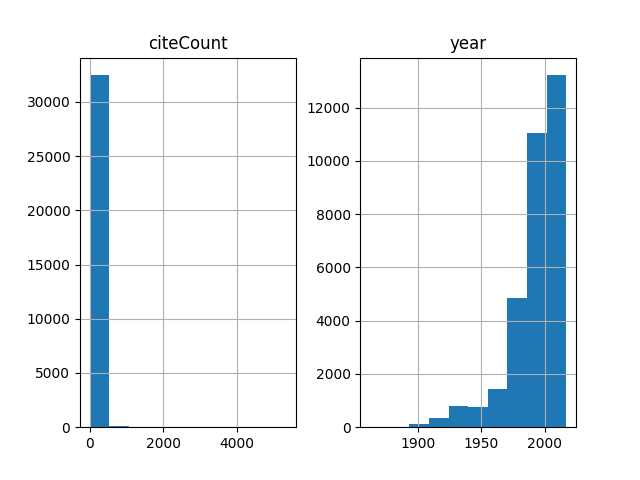

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc46dd78550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc46dcff780>]], dtype=object)

In [5]:
df1[['year','citeCount']].hist()

In [6]:
###################################
# Iterating over documents in a dataframe
###################################
from utils import process_document

processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df1.iterrows():
    docid = i # make document identifier
    text = row['snippet']     # get text snippet
    document = process_document(text) # get sentences/tokens
    processed[docid] = document # add to dictionary    

In [7]:
###################################
# Iterating over documents in text files
###################################
# select all files in your directory
from glob import glob
fnames = glob('contracts/*txt') # selects files using wildcards

# iterate over files
for fname in fnames:
    docid = fname.split('/')[-1][:-4] # get docid from filename
    text = open(fname).read() # read file as string
    document = process_document(text) # get sentences/tokens
    processed[docid] = document # add to dictionary

In [8]:
###################################
# Saving data in python
###################################
# save as python pickle
pd.to_pickle(processed, 'processed_corpus.pkl')